In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('train.csv')
cv = pd.read_csv('test.csv')


In [ ]:
#drop 2 rows by condition
train = train.drop(train[train['Embarked'].isnull()].index.tolist())
#fill by mean in age
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [ ]:
X = train.drop(columns = ['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
cv = cv.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId'])
y = train['Survived']


In [ ]:
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])
X = X.drop(columns = ['Sex_female'])


In [ ]:
X.isna().any()

Age           False
SibSp         False
Parch         False
Fare          False
Pclass_1      False
Pclass_2      False
Pclass_3      False
Sex_male      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2 )

In [ ]:
import seaborn as sb
plt.figure(figsize = [15, 15])

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(train.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(X.join(y).corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
#mutual information mi
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
print(make_mi_scores(X, y))    

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train) 


In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled[:1, :]


In [ ]:
from sklearn.svm import SVC
regressor = SVC(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score
#training accuracy
y_pred = regressor.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.8410689170182841

In [ ]:
#test accuracy
X_test_scaled = scaler.transform(X_test) 
y_pred = regressor.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7921348314606742

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth = 15)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [ ]:

#learning curve
from sklearn.model_selection import learning_curve
train_size, train_scores, test_scores = learning_curve(SVC(C=1.0, kernel = 'poly', degree=5), X, y, cv = 5, scoring ='accuracy', train_sizes = np.linspace(0.01, 1, 10), verbose = 1 )
train_scores = np.mean(train_scores, axis =1 ) 
test_scores = np.mean(test_scores, axis =1 ) 
plt.plot(train_size, train_scores, label = 'training score')
plt.plot(train_size, test_scores, label = 'cv score')
plt.legend(loc = 'best')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


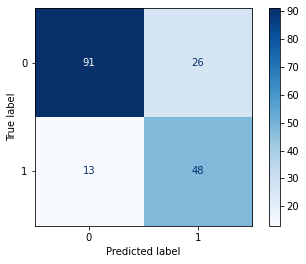

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap= 'Blues')

In [ ]:
#model selection cv
from sklearn.model_selection import GridSearchCV

In [ ]:
c = np.arange(1,5,0.2)
param_grid = dict(C= c)

In [ ]:
grid = GridSearchCV(regressor, param_grid, cv = 10, scoring= 'accuracy')

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])},
             scoring='accuracy')

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)

SVC(C=4.6)
0.7030515832482125


In [ ]:
mode=XGBClassifier()

cross_val_score(
        mode, X_train_scaled, y_train, cv=8, scoring="accuracy",
    ).mean()
    

0.8241668794688458

In [ ]:
##########################
#########################
cv = cv.fillna(cv.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cv = pd.get_dummies(cv, columns = ['Pclass', 'Sex', 'Embarked'])
cv = cv.drop(columns = ['Sex_female'])


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.50000,0,0,7.8292,0,0,1,1,0,1,0
1,47.00000,1,0,7.0000,0,0,1,0,0,0,1
2,62.00000,0,0,9.6875,0,1,0,1,0,1,0
3,27.00000,0,0,8.6625,0,0,1,1,0,0,1
4,22.00000,1,1,12.2875,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,0,0,1,1,0,0,1
414,39.00000,0,0,108.9000,1,0,0,0,1,0,0
415,38.50000,0,0,7.2500,0,0,1,1,0,0,1
416,30.27259,0,0,8.0500,0,0,1,1,0,0,1


In [ ]:
scaler1 = StandardScaler()
cv_scaled = scaler1.fit_transform(cv)

In [ ]:
res = regressor.predict(cv_scaled)


In [ ]:
submit = pd.read_csv('test.csv')

In [ ]:
submit = pd.DataFrame(
    {'PassengerId': submit, 'Survived': res})


In [ ]:
submit.to_csv('Submit.csv',index= False)